# Webscraping Magic The Gathering Subreddit Posts

## Contents:  
- [Load Libraries](#Load-Libraries)
- [Data Collection](#Data-Collection)
- [Start of Project](#Start-of-Project)
- [EDA | Cleaning Data](#EDA-|-Cleaning-Data)
- [Preprocessing & Modeling](#Preprocessing-&-Modeling)
- [Preliminary Conclusion and Reanalysis](#Preliminary-Conclusion-and-Reanalysis)
- [Conclusion](#Conclusion)

## [Load Libraries](#Webscraping-Magic-The-Gathering-Subreddit-Posts)

### Terminology

**API** ("Application Programming Interface"): general set of tools for building software applications

**Web APIs**: a special class of APIs provided by a website (e.g. Facebook API, Instagram API) that typically require you to go through a series of permission checks to generate an API key. Can use to help us extract data from a particular website

In [1]:
#Uncomment the line below when loading libraries for the first time
#!pip install XGboost
import numpy as np
import requests
import time
import pandas as pd
import regex as re
import xgboost as boost
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize                           import RegexpTokenizer
from sklearn.naive_bayes                     import MultinomialNB
from sklearn.ensemble                        import VotingClassifier,RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics                         import confusion_matrix, mean_squared_error, r2_score,roc_auc_score
from sklearn.naive_bayes                     import MultinomialNB
from nltk.stem                               import WordNetLemmatizer
from sklearn.feature_extraction.text         import CountVectorizer, TfidfVectorizer
from sklearn.pipeline                        import Pipeline
from sklearn.model_selection                 import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model                    import LogisticRegression
from nltk.corpus                             import stopwords
import warnings
warnings.filterwarnings("ignore")

## [Data Collection](#Webscraping-Magic-The-Gathering-Subreddit-Posts)

This Section will be commented out. Reason for this is because the pull requests are random to some extent and thus for consistancy I will keep a file of pre requested data to reference. 

#### Step 1: What are we scraping?

The source we're scraping from is formally known as the "API Endpoint" or simply the URL (or web address)

In [2]:
# # API Endpoint
# url_base = 'https://www.reddit.com/r/ModernMagic.json'

#### Step 2: Make the request

We pull requests using the `.get()` function from the `requests` library.

In [3]:
# # Pull request
# requests.get(url = url_base)

In [4]:
# # Explicitly get the status code
# requests.get(url = url_base).status_code

We fix this by adding a User-agent of arbitrary value

In [5]:
# user_agent = {'User-agent': 'ham-ster'}
# res = requests.get(url = url_base,
#                    headers = user_agent)

In [6]:
# # Check type of `res`
# type(res)

#### Step 3: Extract the data

Alright now let's actually start pulling some data. We use the `.json` method for Response objects to extract the data in a tangible format called .json: 

In [7]:
# json_data = res.json()

In [8]:
# # Swim through those layers
# subreddit = json_data['data']['children'][0]['data']['subreddit']
# selftext = json_data['data']['children'][0]['data']['selftext']

In [9]:
# # Check length
# len(json_data['data']['children'])

This is consistent with Reddit's 25-26 posts per pull request limit.

#### What if I wanted to pull the next 25 posts?

We'll need to modify the URL to tell it "OK, now pull the 25 posts **after this post**"

### Putting it all together: Automating Multiple Pull Requests

If we're going to repeat the same thing a set number of times, that should scream: FOR LOOP!

But we don't want to repeat pulling the same 25 posts. How do we automate this?

In [10]:
# # Create an empty template to fill the post info we want to extract
# posts = []
# subreddit_modern = []

# # Instantiate after string
# after = None

In [11]:
# for pull_num in range(0,25):

#     ##### PREPARATIONS #####
    
#     # Create some kind of message to tell us which request number we're at
#     print("Pulling data attempted", pull_num+1, "times")
    
#     # Using string concatenation, append this to the base URL
#     if after == None:
#         new_url = url_base
#     else:
#         new_url = url_base+"?after="+after
    
#     ##### PULLING REQUEST AND EXTRACTING THE DATA #####
    
#     # Step 1: Make request
#     res = requests.get(new_url, headers = user_agent)
    

#     # Step 2: Extract data (but may want to extract some)
#     if res.status_code == 200:
#         json_data = res.json()                     #  Pull JSON
#         posts.extend(json_data['data']['children']) #  Get posts and extend the `posts` list
        
#     # Step 3: Update the after string for next loop
#         after = json_data['data']['after']
#         # 'after' = ID of the last post in this pull iteration
#     else:
#         print("We've run into an error. The status code is:", res.status_code)
#         break

#     # Create a brief pause so the API doesn't lock you out by mistaking you for a machine
#     time.sleep(2)
    
# # Much of the above code is inspired by Boom.

In the next few cells I store title and body text data for later data cleaning. I repeat the process for the next subreddit.

In [12]:
# subreddit = (set([p['data']['selftext'] for p in posts]))
# subreddit_modern = pd.DataFrame({'Text' : [p['data']['selftext'] for p in posts],'Source':'Modern'})
# subreddit_modern_title = pd.DataFrame({'Text' : [p['data']['title'] for p in posts],'Source':'Modern'})

In [13]:
# print("We have:", len(set([p['data']['name'] for p in posts])), "posts in this subreddit")

In [14]:
# subreddit_modern = subreddit_modern.drop_duplicates().reset_index().drop(columns = 'index')
# subreddit_modern_title = subreddit_modern_title.drop_duplicates().reset_index().drop(columns = 'index')

In [15]:
# subreddit_modern.to_csv('./subreddit_modern.csv')

In [16]:
# subreddit_modern_title.to_csv('./subreddit_modern_title.csv')

In [17]:
# # Create an empty template to fill the post info we want to extract
# posts = []
# subreddit_vintage = []

# # Instantiate after string
# after = None
# url_base = 'https://www.reddit.com/r/MTGVintage.json' # API Endpoint

In [18]:
# for pull_num in range(26,50):

#     ##### PREPARATIONS #####
    
#     # Create some kind of message to tell us which request number we're at
#     print("Pulling data attempted", pull_num+1, "times")
    
#     # Using string concatenation, append this to the base URL
#     if after == None:
#         new_url = url_base
#     else:
#         new_url = url_base+"?after="+after
    
#     ##### PULLING REQUEST AND EXTRACTING THE DATA #####
    
#     # Step 1: Make request
#     res = requests.get(new_url, headers = user_agent)
    

#     # Step 2: Extract data (but may want to extract some)
#     if res.status_code == 200:
#         json_data = res.json()                     #  Pull JSON
#         posts.extend(json_data['data']['children']) #  Get posts and extend the `posts` list
        
#     # Step 3: Update the after string for next loop
#         after = json_data['data']['after']
#         # 'after' = ID of the last post in this pull iteration
#     else:
#         print("We've run into an error. The status code is:", res.status_code)
#         break

#     # Create a brief pause so the API doesn't lock you out by mistaking you for a machine
#     time.sleep(2)

In [19]:
# subreddit = (set([p['data']['selftext'] for p in posts]))
# subreddit_vintage = pd.DataFrame({'Text' : [p['data']['selftext'] for p in posts],'Source':'Vintage'})
# subreddit_vintage_title = pd.DataFrame({'Text' : [p['data']['title'] for p in posts],'Source':'Vintage'})

In [20]:
# print("We have:", len(set([p['data']['name'] for p in posts])), "posts in this subreddit")

In [21]:
# subreddit_vintage = subreddit_vintage.drop_duplicates().reset_index().drop(columns = 'index')
# subreddit_vintage_title = subreddit_vintage_title.drop_duplicates().reset_index().drop(columns = 'index')

## [Start of Project](#Webscraping-Magic-The-Gathering-Subreddit-Posts)

Below I read the data files.
This point is basically the start of the code unless one wishes to comment the code in order to run other subreddits. 

In [22]:
# Read stored data
subreddit_vintage = pd.read_csv('./subreddit_vintage.csv')
subreddit_vintage_title = pd.read_csv('./subreddit_vintage_title.csv')
subreddit_modern = pd.read_csv('./subreddit_modern.csv')
subreddit_modern_title = pd.read_csv('./subreddit_modern_title.csv')
subreddit_vintage.head()

,Unnamed: 0,Text,Source
0,0,NaN,Vintage
1,1,[[City in a Bottle]]\n\nWhy is this card $300?...,Vintage
2,2,The chips are stacked heavily against PO speci...,Vintage
3,3,Would a flash hulk deck be viable in Vintage? ...,Vintage
4,4,"Hi!\n\nSince I understood, that I have a game ...",Vintage


In [23]:
subreddit_vintage_title.head()

,Unnamed: 0,Text,Source
0,0,Vintage 101: 20-20-20-4 Hours Ago,Vintage
1,1,Why on god's green earth is City in a Bottle $...,Vintage
2,2,Vintage 101: Dack Fayden vs. the World,Vintage
3,3,Sooo... Is storm just dead?,Vintage
4,4,Vintage 101: The Aftermath,Vintage


In [24]:
subreddit_modern.head()

,Unnamed: 0,Text,Source
0,0,B&amp;R Update: Bridge from Below banned. No o...,Modern
1,1,"Modern League — July 9, 2019",Modern
2,2,What are some of the most 50/50 match ups in m...,Modern
3,3,How do you beat e-tron?,Modern
4,4,Modern Deck Idea: Thunderkin Skelementals,Modern


In [25]:
subreddit_modern_title.head()

,Unnamed: 0,Text,Source
0,0,B&amp;R Update: Bridge from Below banned. No o...,Modern
1,1,"Modern League — July 9, 2019",Modern
2,2,What are some of the most 50/50 match ups in m...,Modern
3,3,How do you beat e-tron?,Modern
4,4,Modern Deck Idea: Thunderkin Skelementals,Modern


## [EDA | Cleaning Data](#Webscraping-Magic-The-Gathering-Subreddit-Posts)

Problem Statement : We are white hat incorporated, a vast network of hackers that restore order and keep the piece. Reddit was hacked on Saturday bringing down the entire electric grid in midtown Manhattan with it.  It is now that we must step in and restore order.
Millions of dollars have been lost in the ads space. We have a small database of posts we can use to build a model that can index the subreddits and we need to have a notebook that is consistent, accurate and minimizes false positives.

Merging files, changing names and dropping unnecessary columns. All final dataframes start with df_ and end with the subreddit they belong to. They contain the Body and Title of said reddit.

After much consideration, I decided to go for body content only as it is more useful because it has more information.

In [26]:
df_vintage = subreddit_vintage.drop(columns = 'Unnamed: 0')
df_modern = subreddit_modern.drop(columns = 'Unnamed: 0')

In [27]:
df_modern.head()

,Text,Source
0,B&amp;R Update: Bridge from Below banned. No o...,Modern
1,"Modern League — July 9, 2019",Modern
2,What are some of the most 50/50 match ups in m...,Modern
3,How do you beat e-tron?,Modern
4,Modern Deck Idea: Thunderkin Skelementals,Modern


In [28]:
# Here we use count vec but somehow I do not trust the counts. Lets try something else
cvec = CountVectorizer(stop_words='english')
df_modern_EDA = cvec.fit_transform(df_modern['Text'])
# Here I show the max occurance of each word after removing english stop words
pd.DataFrame(df_modern_EDA.toarray(),columns=cvec.get_feature_names()).describe().T[['max']].sort_values(by = 'max',ascending=False).head(20)

,max
played,2.0
turns,2.0
phoenix,2.0
bird,2.0
team,2.0
eladamri,2.0
eldrazi,2.0
big,2.0
damage,2.0
tron,2.0


Here we see using count vec that the most frequent words occur twice. Also that they are very spacific. Hmmm seems low, lets lematize.

In [29]:
# Lematizing in this cell to find better word value counts. Showing top 20. As you can see, this is the point where I need to add stop words.
lematizing = WordNetLemmatizer().lemmatize
#looks like we need to regex
lematized_words = [lematizing(word) for row in df_modern['Text'].str.replace('[^a-zA-Z ]','') for word in str(row).lower().split()]
word_count = {}
for word in lematized_words:
    word_count[word] = 0
for word in lematized_words:
    word_count[word] += 1
df_modern_eda = pd.DataFrame([{i:j} for i,j in zip(word_count.keys(),word_count.values())]).describe().T[['max']].sort_values(by = 'max',ascending=False)
df_modern_eda.head(20)

,max
modern,209.0
deck,161.0
the,158.0
a,146.0
in,132.0
to,130.0
of,105.0
for,96.0
and,90.0
is,82.0


So here I find that I get more realitic value counts but I need to add some stop words.

Next I lematize using the second subreddit. I think stop words for this and the previous posts will have to be exclusion of similar words.

In [30]:
# Lematizing in this cell to find better word value counts. Showing top 20. As you can see, this is the point where I need to add stop words.
lematizing = WordNetLemmatizer().lemmatize
#looks like we need to regex
lematized_words = [lematizing(word) for row in df_vintage['Text'].str.replace('[^a-zA-Z ]','') for word in str(row).lower().split()]
word_count = {}
for word in lematized_words:
    word_count[word] = 0
for word in lematized_words:
    word_count[word] += 1
df_vintage_eda = pd.DataFrame([{i:j} for i,j in zip(word_count.keys(),word_count.values())]).describe().T[['max']].sort_values(by = 'max',ascending=False)
df_vintage_eda.head(20)

,max
the,1870.0
a,1570.0
i,1514.0
to,1480.0
and,1414.0
of,1058.0
in,754.0
deck,714.0
it,677.0
is,628.0


In [31]:
# The values in df_vintage_eda not in df_modern_eda
words_in_vintage = set(list(df_vintage_eda.iloc[:,0].index))-set(list(df_modern_eda.iloc[:,0].index))
df_vintage_eda = df_vintage_eda.reset_index()
df_vintage_eda.tail()

,index,max
5906,infested,1.0
5907,infinitely,1.0
5908,influx,1.0
5909,infrequent,1.0
5910,zombie,1.0


Now time to find word that are only present in the vintage subreddit and not in modern. After this I get rid of the words that are longer than 18 characters long because they are hyperlinks and not relevant. This part replaces stop words.

In [32]:
# eliminating words that are too short or too long
df_vintage_clean = pd.DataFrame()
for vintage in list(words_in_vintage):
    if ((len(vintage) < 18) and (len(vintage) > 3)):
        df_vintage_clean = pd.concat([df_vintage_clean,df_vintage_eda.iloc[np.where(df_vintage_eda['index'] ==vintage)[0][0],:]],axis = 1)
df_vintage_clean = df_vintage_clean.T.sort_values(by = 'max',ascending = False).reset_index().drop(columns = 'level_0')
df_vintage_clean.head()

,index,max
0,vintage,513
1,oath,147
2,power,97
3,also,85
4,than,67


In [33]:
df_vintage_clean.tail()

,index,max
4278,revival,1
4279,suddenly,1
4280,statement,1
4281,swordi,1
4282,islandunderground,1


In [34]:
# The values in df_modern_eda not in df_modern_eda
words_in_modern = set(list(df_modern_eda.iloc[:,0].index))-set(list(df_vintage_eda.iloc[:,0].index))
df_modern_eda = df_modern_eda.reset_index()
df_modern_eda.head()

,index,max
0,modern,209.0
1,deck,161.0
2,the,158.0
3,a,146.0
4,in,132.0


In [35]:
df_modern_eda.tail()

,index,max
1691,improvement,1.0
1692,improved,1.0
1693,imperious,1.0
1694,illinois,1.0
1695,zzz,1.0


Now time to find word that are only present in the modern subreddit and not in vintage. After this I get rid of the words that are longer than 18 characters long because they are hyperlinks and not relevant. This part replaces stop words.

In [36]:
# eliminating words that are too short or too long
df_modern_clean = pd.DataFrame()
for modern in list(words_in_modern):
    if ((len(modern) < 18) and (len(modern) > 3)):
        df_modern_clean = pd.concat([df_modern_clean,df_modern_eda.iloc[np.where(df_modern_eda['index'] ==modern)[0][0],:]],axis = 1)
df_modern_clean = df_modern_clean.T.sort_values(by = 'max',ascending = False).reset_index().drop(columns = 'level_0')
df_modern_clean.head()

,index,max
0,modern,209
1,deck,161
2,with,75
3,help,59
4,control,49


In [37]:
df_modern_clean.tail()

,index,max
1470,release,1
1471,surprised,1
1472,aggrocentric,1
1473,blistercoil,1
1474,lavinia,1


Plotting the distribution of words. By highest occurance.

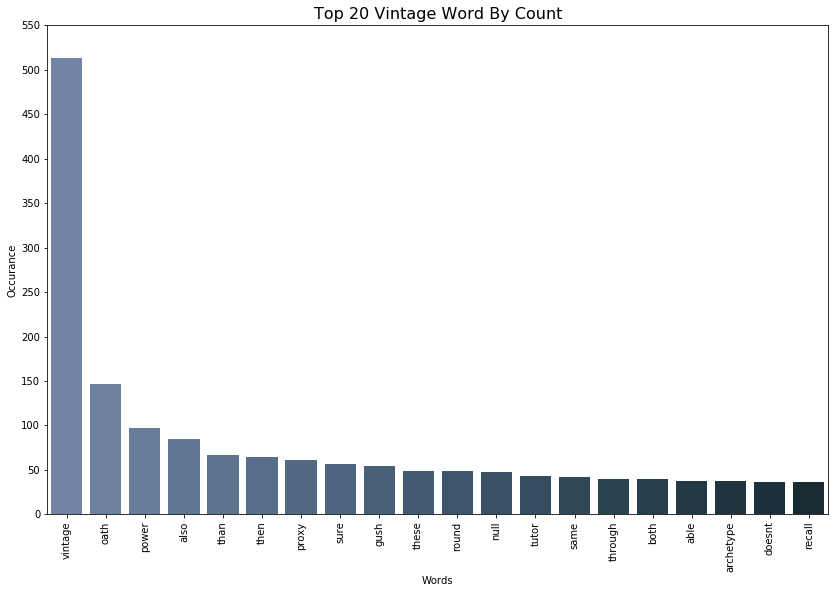

In [38]:
#Code for plotting the highest occurance of cords in the Vintage Subreddit
plt.figure(figsize = (14,9))
Words = pd.DataFrame(df_vintage_clean.head(20))
sns.barplot(x = Words['index'], y = Words['max'].sort_values(),palette = "ch:2.5,.2,light=.5")
plt.title('Top 20 Vintage Word By Count', fontsize = 16)
plt.xlabel('Words')
plt.ylabel('Occurance')
plt.yticks(np.linspace(0,550,12))
plt.xticks(rotation = 90);

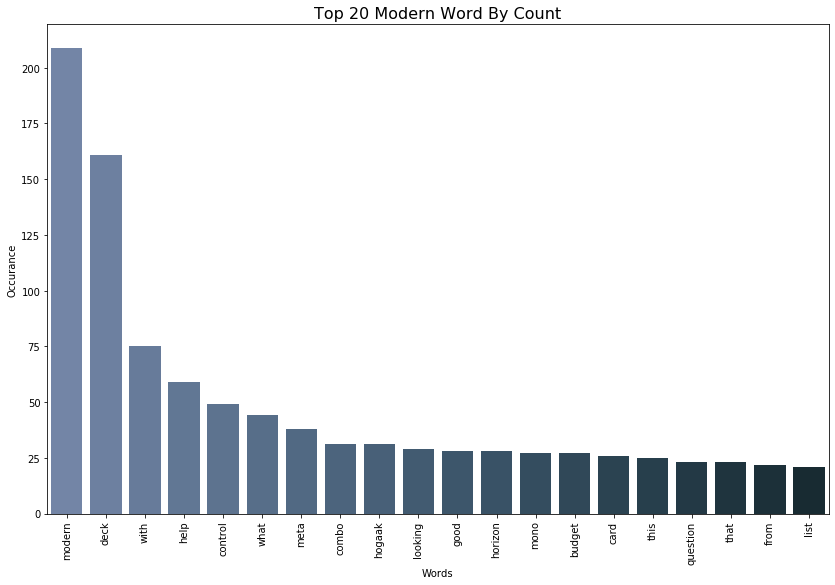

In [39]:
#Code for plotting the highest occurance of cords in the Modern Subreddit
plt.figure(figsize = (14,9))
Words = pd.DataFrame(df_modern_clean.head(20))
sns.barplot(x = Words['index'], y = Words['max'].sort_values(),palette = "ch:2.5,.2,light=.5")
plt.title('Top 20 Modern Word By Count', fontsize = 16)
plt.xlabel('Words')
plt.ylabel('Occurance')
plt.xticks(rotation = 90);

## [Preprocessing & Modeling](#Webscraping-Magic-The-Gathering-Subreddit-Posts)

In [40]:
# In this cell I map the source to modern : 0 and vintage : 1
df_modern_clean['source'] = 'modern'
df_vintage_clean['source'] = 'vintage'
df_magic = pd.concat([df_modern_clean,df_vintage_clean])
df_magic['source'] = df_magic['source'].map({'modern': 0, 'vintage' : 1})
df_magic.head()

,index,max,source
0,modern,209,0
1,deck,161,0
2,with,75,0
3,help,59,0
4,control,49,0


In [41]:
df_magic.tail()

,index,max,source
4278,revival,1,1
4279,suddenly,1,1
4280,statement,1,1
4281,swordi,1,1
4282,islandunderground,1,1


In [42]:
#Splitting data indo test and train data, and stratifying data.
df_magic_matrix = pd.get_dummies(df_magic,drop_first=True)
y = df_magic_matrix['source']
X = df_magic_matrix.drop(columns = 'source')
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

Baseline

In [43]:
df_magic.groupby(['source'])['max'].sum()/(df_magic['max'].sum())

source
0    0.269764
1    0.730236
Name: max, dtype: float64

Looks like the baseline score to beat is 73.0236%

### Start of model

In [44]:
def gridsearch(pipe,pipe_params):
    gs = GridSearchCV(pipe, param_grid=pipe_params, cv=5,verbose=1,n_jobs=4)
    gs.fit(X_train, y_train)
    print(f'Train ROC AUC : {(roc_auc_score(y_train,gs.predict(X_train)))}')
    print(f'Test ROC AUC is : {(roc_auc_score(y_test,gs.predict(X_test)))}')
    print(f'Best Score (accuracy) is : {gs.best_score_}')
    return gs

In [45]:
# Pipeline setup for the best alpha and prior fit settings
pipe = Pipeline([
    ('mnb', MultinomialNB()),
])
pipe_params = {
    'mnb__alpha':np.linspace(0,1,10),
    'mnb__fit_prior':[True,False]
}
mnb = gridsearch(pipe,pipe_params)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   15.0s finished


Train ROC AUC : 0.8209764918625678
Test ROC AUC is : 0.4999544533260459
Best Score (accuracy) is : 0.7440944881889764


In [46]:
# logistic regression model 
pipe = Pipeline([
    ('lr', LogisticRegression())
])
pipe_params = {
    'lr__penalty':['l1','l2'],
    'lr__C': np.linspace(0.5,1.5,5),
    'lr__tol':np.linspace(0.001,0.01,5),
}
logit = gridsearch(pipe,pipe_params)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   28.4s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:   39.0s finished


Train ROC AUC : 0.5
Test ROC AUC is : 0.5
Best Score (accuracy) is : 0.7438628994905049


Using the default hyperparameters but applying a voting classifier; we were able to retrieve an accuracy score of 74.36% which better than the 73.11% obtained for the baseline. Hmm. close to a random guess at this point. The ROC curve which shows the rate of true positives to false positives will likely not connect.

In [47]:
# Confusion matrix for X_train 
def cf(X,y):
    TN, FP, FN, TP = confusion_matrix(X,y).ravel()
    print(f'True Positive: {TP}')
    print(f'True Negative: {TN}')
    print(f'False Positive: {FP}')
    print(f'False Negative: {FN}')
    print(f'Accuracy Rate: {(TP+TN)/(TP+TN+FP+FN)}')
    print(f'Misclassification Rate: {(1-((TP+TN)/(TP+TN+FP+FN)))}')
    print(f'Sensivitiy: {(TP)/(TP+FN)}')
    print(f'Specificity: {(TN)/(TN+FP)}') 
    print(f'Precision: {(TP)/(TP+FP)}') 
    print(confusion_matrix(X,y))

In [48]:
# confusion matrix test data
y_hat = mnb.predict(X_test)
cf(y_test,y_hat)

True Positive: 1068
True Negative: 1
False Positive: 368
False Negative: 3
Accuracy Rate: 0.7423611111111111
Misclassification Rate: 0.25763888888888886
Sensivitiy: 0.9971988795518207
Specificity: 0.0027100271002710027
Precision: 0.7437325905292479
[[   1  368]
 [   3 1068]]


In [49]:
# confusion matrix test data
y_hat = logit.predict(X_test)
cf(y_test,y_hat)

True Positive: 1071
True Negative: 0
False Positive: 369
False Negative: 0
Accuracy Rate: 0.74375
Misclassification Rate: 0.25625
Sensivitiy: 1.0
Specificity: 0.0
Precision: 0.74375
[[   0  369]
 [   0 1071]]


As hypothesized this ROC curve is not good. Maybe switching the source from modern = 0 to modern = 1 will have an effect

In [50]:
# In this cell I map the source vector to modern : 1 and vintage : 0 effectively switching the source coding. Maybe this will have some impact on the curve
df_modern_clean['source'] = 'modern'
df_vintage_clean['source'] = 'vintage'
df_magic = pd.concat([df_modern_clean,df_vintage_clean])
df_magic['source'] = df_magic['source'].map({'modern': 0, 'vintage' : 1})
df_magic.head()

,index,max,source
0,modern,209,0
1,deck,161,0
2,with,75,0
3,help,59,0
4,control,49,0


In [51]:
#Splitting data indo test and train data, and stratifying data.
df_magic_matrix = pd.get_dummies(df_magic,drop_first=True)
y = df_magic_matrix['source']
X = df_magic_matrix.drop(columns = 'source')

In [52]:
# function for roc curve.
def roc_curve(features, true_value,pred_proba,model):
    pred_df = pd.DataFrame({'true_values': true_value,
                        'pred_probs':pred_proba})
    # Create figure.
    plt.figure(figsize = (10,7))

    # Create threshold values. (Dashed red line in image.)
    thresholds = np.linspace(0, 1, 200)

    # Define function to calculate sensitivity. (True positive rate.)
    def TPR(df, true_col, pred_prob_col, threshold):
        true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
        false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
        return true_positive / (true_positive + false_negative)


    # Define function to calculate 1 - specificity. (False positive rate.)
    def FPR(df, true_col, pred_prob_col, threshold):
        true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
        false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
        return 1 - (true_negative / (true_negative + false_positive))

    # Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
    tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
    fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

    # Plot ROC curve.
    plt.plot(fpr_values, # False Positive Rate on X-axis
             tpr_values, # True Positive Rate on Y-axis
             label='ROC Curve')

    # Plot baseline. (Perfect overlap between the two populations.)
    plt.plot(np.linspace(0, 1, 200),
             np.linspace(0, 1, 200),
             label='baseline',
             linestyle='--')

    # Label axes.
    plt.title(f'{model} ROC Curve with AUC = {round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)}', fontsize=22)
    plt.ylabel('Sensitivity', fontsize=18)
    plt.xlabel('1 - Specificity', fontsize=18)

    # Create legend.
    plt.legend(fontsize=16);
# Code inspired by Lecture @ DSI 8

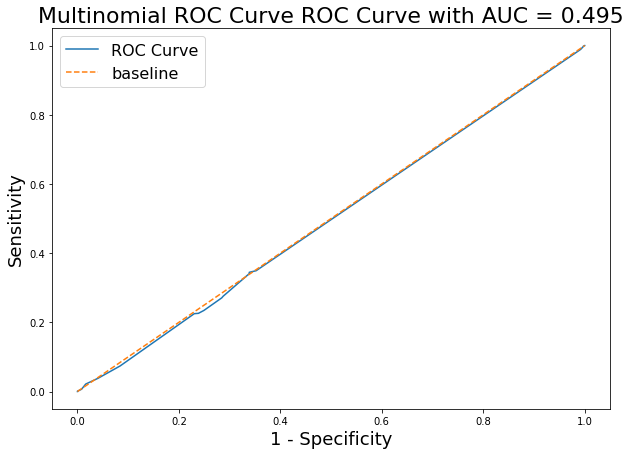

In [53]:
# multinomial naive bayes model ROC curve
pred_proba = [i[1] for i in mnb.predict_proba(X_test)]
roc_curve(X_test,y_test,pred_proba,'Multinomial ROC Curve')

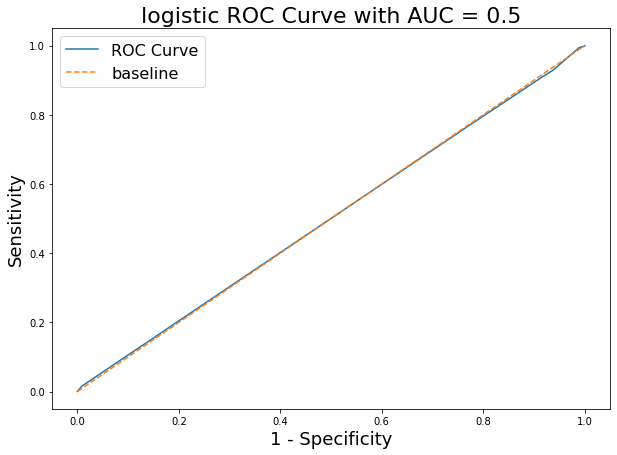

In [54]:
# multinomial naive bayes model ROC curve
y_hat = logit.predict(X_test)
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':y_hat})
pred_proba = [i[1] for i in logit.predict_proba(X_test)]
roc_curve(X_test,y_test,pred_proba,'logistic')

Here I test out the entire data, I found that I get a reasonable score but still see a missing concept.

## [Preliminary Conclusion and Reanalysis](#Webscraping-Magic-The-Gathering-Subreddit-Posts)

My final conclusion is that this is not a good model. With the data we had stored in cold storage I was able to make a model that is better than guessing but only by a marginal amount. The fact that this model can outperform a baseline guess of 73% based on historical data, is great! The issue is that we can only do 1% better. As a white hat hacker I am disapointed in the outcome and inability to effectively map the remainder of the posts to a subreddit however I suggest looking at this notebook and ammending it in order to redeem ourselves because I can not in good faith put my name on a 1% improvement. 

Meta view suggestions for a better model are as follows; lematizing needs to be handeled better. I believe the approach was non conventional. A corpus was created but a different aproach was taken. I believe that not enough words were deleted. If we look at the verbage, large words are used frequently thus common words can be removed that are unnecessary 

In [55]:
#Creating raw dataframe of both subreddits 
df_magic_raw = pd.concat([df_modern,df_vintage],axis = 0)
df_magic_raw = df_magic_raw.dropna()

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df_magic_raw[['Text']],
                                                   df_magic_raw['Source'].map({'Modern': 0, 'Vintage' : 1}),
                                                   random_state = 42)

In [57]:
def review_to_words(raw_review):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    
    # 1. Remove HTML.
    review_text = raw_review
    
    # 2. Remove non-letters.
    try:
        letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    except:
        print(review_text)
    
    # 3. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # 4. In Python, searching a set is much faster than searching
    # a list, so convert the stop words to a set.
    stops = set(stopwords.words('english'))
    
    # 5. Remove stop words.
    meaningful_words = [w for w in words if not w in stops]
    
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))

In [58]:
# Get the number of reviews based on the dataframe size.
total_reviews = df_magic_raw.shape[0]
print(f'There are {total_reviews} reviews.')
# Initialize an empty list to hold the clean reviews.
clean_train_reviews = []
clean_test_reviews = []

There are 1383 reviews.


In [59]:
print("Cleaning and parsing the training set movie reviews...")

j = 0
for train_review in X_train['Text']:
    # Convert review to words, then append to clean_train_reviews.
    clean_train_reviews.append(review_to_words(train_review))
    
    # If the index is divisible by 1000, print a message
    if (j + 1) % 100 == 0:
        print(f'Review {j + 1} of {total_reviews}.')
    
    j += 1

# Let's do the same for our testing set.

print("Cleaning and parsing the testing set movie reviews...")

for test_review in X_test['Text']:
    # Convert review to words, then append to clean_train_reviews.
    clean_test_reviews.append(review_to_words(test_review))
    
    # If the index is divisible by 1000, print a message
    if (j + 1) % 100 == 0:
        print(f'Review {j + 1} of {total_reviews}.')
        
    j += 1

Cleaning and parsing the training set movie reviews...
Review 100 of 1383.
Review 200 of 1383.
Review 300 of 1383.
Review 400 of 1383.
Review 500 of 1383.
Review 600 of 1383.
Review 700 of 1383.
Review 800 of 1383.
Review 900 of 1383.
Review 1000 of 1383.
Cleaning and parsing the testing set movie reviews...
Review 1100 of 1383.
Review 1200 of 1383.
Review 1300 of 1383.


In [60]:
# Import CountVectorizer.
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.
vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             max_features = 5000) 

In [61]:
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.

train_data_features = vectorizer.fit_transform(clean_train_reviews)

test_data_features = vectorizer.transform(clean_test_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array.
train_data_features = train_data_features.toarray()

In [62]:
print(train_data_features.shape)

(1037, 5000)


In [63]:
corpus = vectorizer.get_feature_names()
print(corpus)

['abandon', 'abandoned', 'abandoning', 'abilities', 'ability', 'able', 'aboard', 'abolisher', 'abrade', 'abrupt', 'absence', 'absolute', 'absolutely', 'abstrakt', 'absurd', 'absurdly', 'abundance', 'abuses', 'abusing', 'abzan', 'abzanghosway', 'academic', 'academy', 'acceleration', 'accept', 'acceptable', 'accepted', 'access', 'accessible', 'accompany', 'according', 'account', 'accumulated', 'accurate', 'acolyte', 'acquire', 'across', 'act', 'action', 'activate', 'activated', 'active', 'acts', 'actual', 'actually', 'ad', 'adapt', 'adaptation', 'adapting', 'adaptiveautomaton', 'add', 'added', 'adding', 'addition', 'additional', 'additionally', 'address', 'adds', 'addtional', 'adept', 'adf', 'adjust', 'admit', 'admittedly', 'adopt', 'adopts', 'ads', 'adult', 'advance', 'advancing', 'advantage', 'advantages', 'advent', 'advice', 'advise', 'ae', 'aeons', 'aether', 'afar', 'affect', 'affects', 'affinity', 'afford', 'affordable', 'aforementioned', 'afraid', 'afternoon', 'afterwards', 'agains

In [64]:
def gridsearch(pipe,pipe_params):
    gs = GridSearchCV(pipe, param_grid=pipe_params, cv=5,verbose=1,n_jobs=4)
    gs.fit(train_data_features, y_train)
    print(f'Train ROC AUC : {(roc_auc_score(y_train,gs.predict(train_data_features)))}')
    print(f'Test ROC AUC is : {(roc_auc_score(y_test,gs.predict(test_data_features)))}')
    print(f'Best Score (accuracy) is : {gs.best_score_}')
    return gs

In [65]:
# logistic regression model 
pipe = Pipeline([
    ('lr', LogisticRegression())
])
pipe_params = {
    'lr__penalty':['l1','l2'],
    'lr__C': np.linspace(0.5,1.5,5),
    'lr__tol':np.linspace(0.001,0.01,5),
}
logit = gridsearch(pipe,pipe_params)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   12.0s


Train ROC AUC : 0.9876923076923076
Test ROC AUC is : 0.9357798165137614
Best Score (accuracy) is : 0.9614271938283511


[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:   14.0s finished


In [66]:
# multinomial naive bayes model

pipe = Pipeline([
    ('MNB', MultinomialNB())
])
pipe_params = {
    'MNB__alpha':np.linspace(0,5,5),
    'MNB__fit_prior':[True,False]
}
mnb = gridsearch(pipe,pipe_params)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Train ROC AUC : 0.978798617113224
Test ROC AUC is : 0.9296442534742383
Best Score (accuracy) is : 0.9286403085824494


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    1.6s finished


In [67]:
# xtra gradient boost naive bayes model
pipe = Pipeline([
    ('xtr', boost.XGBClassifier())
    ])
pipe_params = {
'xtr__silent':[1],
'xtr__nthread': [4],
'xtr__n_estimators': [100]
}
xgb = gridsearch(pipe,pipe_params)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   51.7s finished


Train ROC AUC : 0.96
Test ROC AUC is : 0.9128440366972477
Best Score (accuracy) is : 0.9508196721311475


In [68]:
# Confusion matrix for X_test logistic regresion
y_hat = logit.predict(test_data_features)
cf(y_test,y_hat)

True Positive: 95
True Negative: 237
False Positive: 0
False Negative: 14
Accuracy Rate: 0.9595375722543352
Misclassification Rate: 0.040462427745664775
Sensivitiy: 0.8715596330275229
Specificity: 1.0
Precision: 1.0
[[237   0]
 [ 14  95]]


In [69]:
# Confusion matrix for X_train multinomial
y_hat = mnb.predict(test_data_features)
cf(y_test,y_hat)

True Positive: 107
True Negative: 208
False Positive: 29
False Negative: 2
Accuracy Rate: 0.9104046242774566
Misclassification Rate: 0.08959537572254339
Sensivitiy: 0.981651376146789
Specificity: 0.8776371308016878
Precision: 0.7867647058823529
[[208  29]
 [  2 107]]


In [70]:
#fuction defining roc curve
def roc_curve(features, true_value,pred_proba,model):
    pred_df = pd.DataFrame({'true_values': true_value,
                        'pred_probs':pred_proba})
    # Create figure.
    plt.figure(figsize = (10,7))

    # Create threshold values. (Dashed red line in image.)
    thresholds = np.linspace(0, 1, 200)

    # Define function to calculate sensitivity. (True positive rate.)
    def TPR(df, true_col, pred_prob_col, threshold):
        true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
        false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
        return true_positive / (true_positive + false_negative)


    # Define function to calculate 1 - specificity. (False positive rate.)
    def FPR(df, true_col, pred_prob_col, threshold):
        true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
        false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
        return 1 - (true_negative / (true_negative + false_positive))

    # Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
    tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
    fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

    # Plot ROC curve.
    plt.plot(fpr_values, # False Positive Rate on X-axis
             tpr_values, # True Positive Rate on Y-axis
             label='ROC Curve')

    # Plot baseline. (Perfect overlap between the two populations.)
    plt.plot(np.linspace(0, 1, 200),
             np.linspace(0, 1, 200),
             label='baseline',
             linestyle='--')

    # Label axes.
    plt.title(f'{model} ROC Curve with AUC = {round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)}', fontsize=22)
    plt.ylabel('Sensitivity', fontsize=18)
    plt.xlabel('1 - Specificity', fontsize=18)

    # Create legend.
    plt.legend(fontsize=16);
# Code inspired by Lecture @ DSI 8

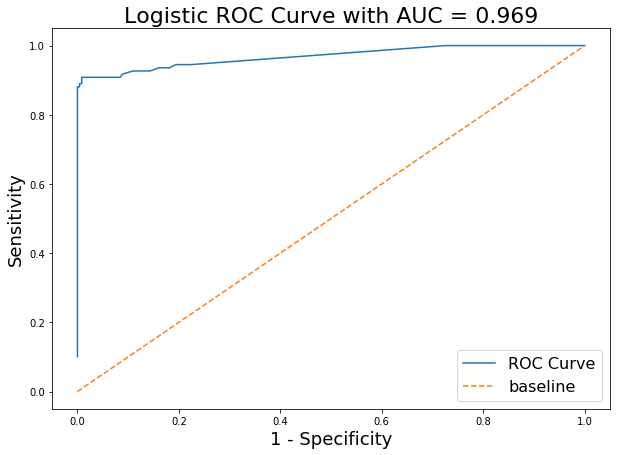

In [71]:
# logistic regression ROC curve
pred_proba = [i[1] for i in logit.predict_proba(test_data_features)]
roc_curve(test_data_features,y_test,pred_proba,'Logistic')

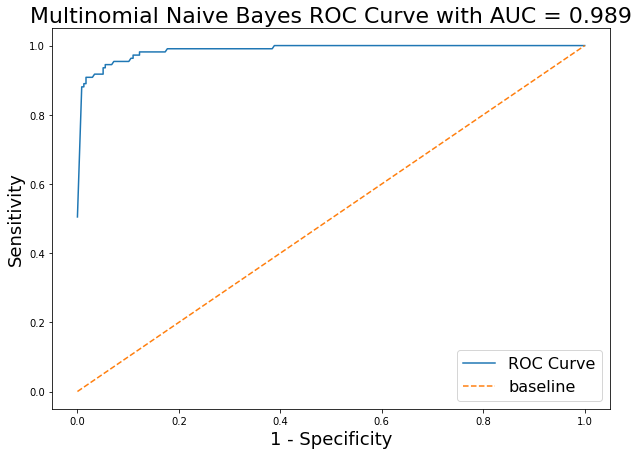

In [72]:
# multinomial naive bayes model ROC curve
pred_proba = [i[1] for i in mnb.predict_proba(test_data_features)]
roc_curve(test_data_features,y_test,pred_proba,'Multinomial Naive Bayes')

In [73]:
def dist_p(features, true_value,pred_proba,model):
    pred_df = pd.DataFrame({'true_values': true_value,
                    'pred_probs':pred_proba})
    # Create figure.
    plt.figure(figsize = (10,7))

    # Create two histograms of observations.
    plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
             bins=25,
             color='g',
             alpha = 0.6,
             label='Outcome = Modern')
    plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
             bins=25,
             color='b',
             alpha = 0.6,
             label='Outcome = Vintage')

    # Add vertical line at P(Outcome = 1) = 0.5.
    plt.vlines(x=0.5,
               ymin = 0,
               ymax = 110,
               color='r',
               linestyle = '--')

    # Label axes.
    plt.title(f'{model} Distribution of P(Outcome = Vintage)', fontsize=22)
    plt.ylabel('Frequency', fontsize=18)
    plt.yticks(np.linspace(0,140,15))
    plt.xticks(np.linspace(0,1,11))
    plt.xlabel('Predicted Probability that Outcome = Vintage', fontsize=18)

    # Create legend.
    plt.legend(loc='upper center',fontsize=20);
# Code inspired by Lecture @ DSI 8

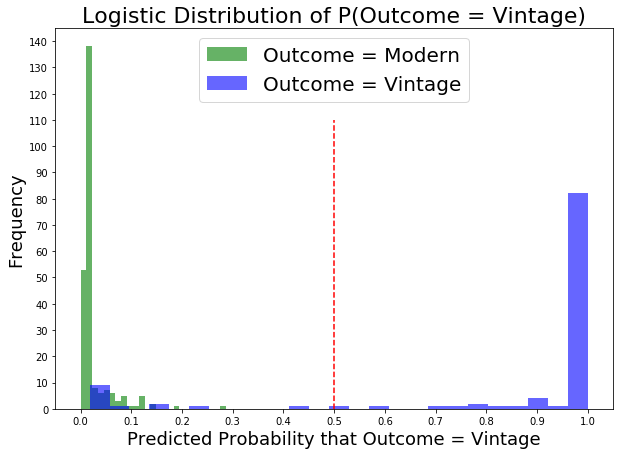

In [74]:
# logistic regression outcomes plot
pred_proba = [i[1] for i in logit.predict_proba(test_data_features)]
dist_p(test_data_features,y_test,pred_proba,'Logistic')

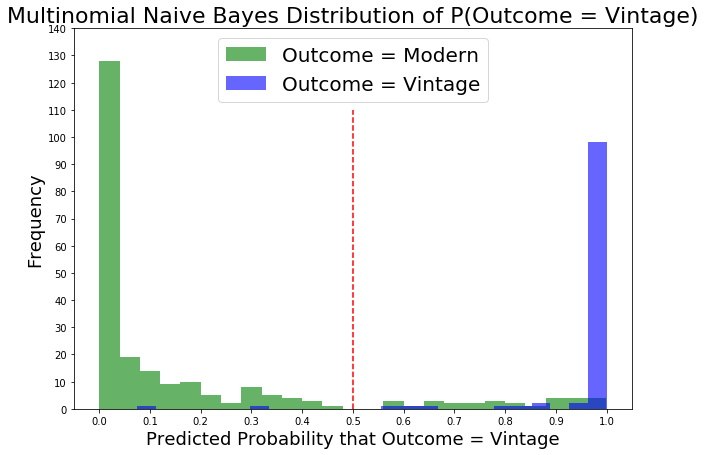

In [75]:
# multinomial naive bayes model outcome plot
pred_proba = [i[1] for i in mnb.predict_proba(test_data_features)]
dist_p(test_data_features,y_test,pred_proba,'Multinomial Naive Bayes')

## [Conclusion](#Webscraping-Magic-The-Gathering-Subreddit-Posts)

Limitations

The first attempt at removing stop words that were in too long and too short and not in the other subreddits failed to perform. In fact it was basically as good as a random guess.
The second method by which CountVectorizer removed stopwords and was applied yielded a fantastic score both for accuracy and precision as well as ROC AUC. 
Limitations are: Using this model for other subreddits unrelated to magic the gathering. For those posts we need to pull archives and follow the same procedure to make a different model.
Not for use in other languages. Apparent that the language evolves so use during time window of 6 to 12 months. This is the block size for magic. 
